# Least action principle

## Context 

Principle of least action is a framework that reformulates the laws of mechanics—in particular the fundamental dynamical principle encapsulated in Newton’s second law. Its core statement is that a classical system evolves along the trajectory $\vec{r}(t)$ that extremizes a functional known as the action. Furthermore, quantum mechanics can be consistently motivated from this principle once one allows the system to sample all possible trajectories.

The first part of the exam outlines the concept of a “trajectory,” understood as the curve traced by the system in space-time $(t, \vec{x})$. The second part introduces a numerical scheme for evaluating integrals and assessing the accuracy of the computed values. A third bonus part illustrates the evaluation of the action in a concrete physical scenario.


### Import packages and plot cosmetics

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
mpl.rcParams['legend.frameon']  = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize']  = 18
mpl.rcParams['axes.labelsize']  = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize']  = (10, 7)

## Working with a trajectory

We will consider a 1D system: a falling ball described by its height which varies with time $z(t)$.

Boundary conditions : 

initial coordinate is $z_i=1$ at $t_i=0$ and the 
final coordinate is $z_f=0$ at $t_f=1$.

Now we consider sets of functions 

$$f_p(t) = (1-t)^p $$
that pass by these two points, where $p$ will vary. 

Write a python function calculating to $f_p(t)$ for any $t$ and $p$ values. On the same figure, overlay curves corresponding to the points $(t, f_p(t))$ for 5 different $p$ values, from 0.1 to 10.


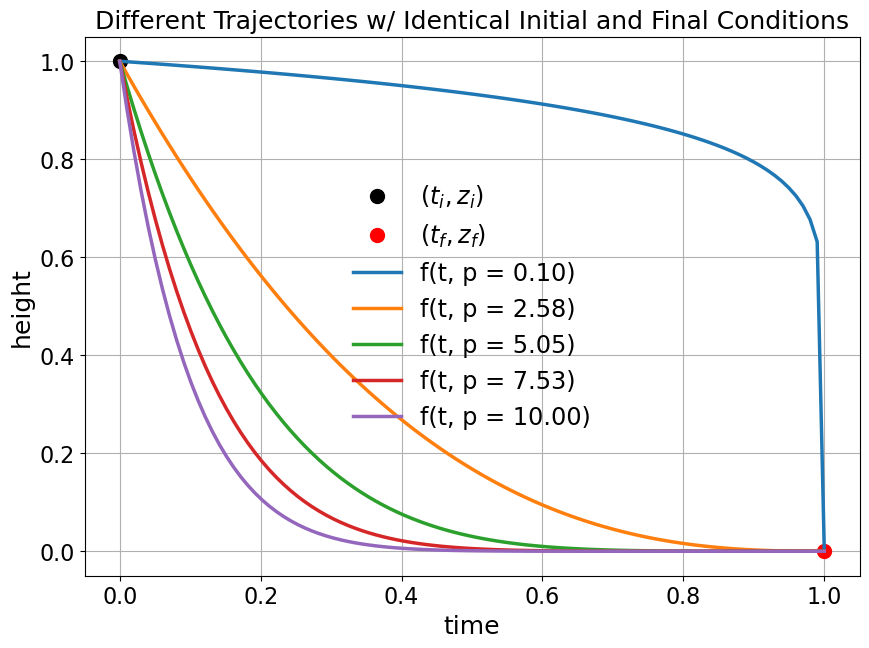

In [3]:
# Definning initial and final coordinates

zi, ti = 1, 0  # initial
zf, tf = 0, 1  # final

#  plotting initial points

plt.title("Different Trajectories w/ Identical Initial and Final Conditions")
plt.plot(ti, zi, "o", markersize = 10, color = "k", label = "$(t_i, z_i)$")
plt.plot(tf, zf, "o", markersize = 10, color = "red", label = "$(t_f, z_f)$")
plt.xlabel("time")
plt.ylabel("height")



# Funtion to create a family of functions

def fp(t, p):
    return (1-t)**p


# plot of 5 different funtions fp

t = np.linspace(0, 1, 100)  # time variable
p_val = np.linspace(0.1, 10, 5)  # different p values


# loop to create the over the p values 

for p in p_val:
    plt.plot(t, fp(t,p), label = f"f(t, p = {p:.2f})")
plt.legend(loc = "center")
plt.grid()

plt.savefig("trajectories.png", dpi = 300)

 Numerically computing the derivative of this trajectory $\frac{\Delta x}{\Delta t}$, defined as below. Note that in this definition, the obtained derivative is actually the one evaluated on $\frac{t_{i+1}+t_{i}}{2}$. 
$$
\frac{\Delta x}{\Delta t} \equiv \frac{x_{i+1} - x_{i}}{t_{i+1} - t_{i}}
$$

dim(xs) = 1000, dim(ts) = 1000
dim(v) = 999 , dim(f) = 999 , dim(t) = 999


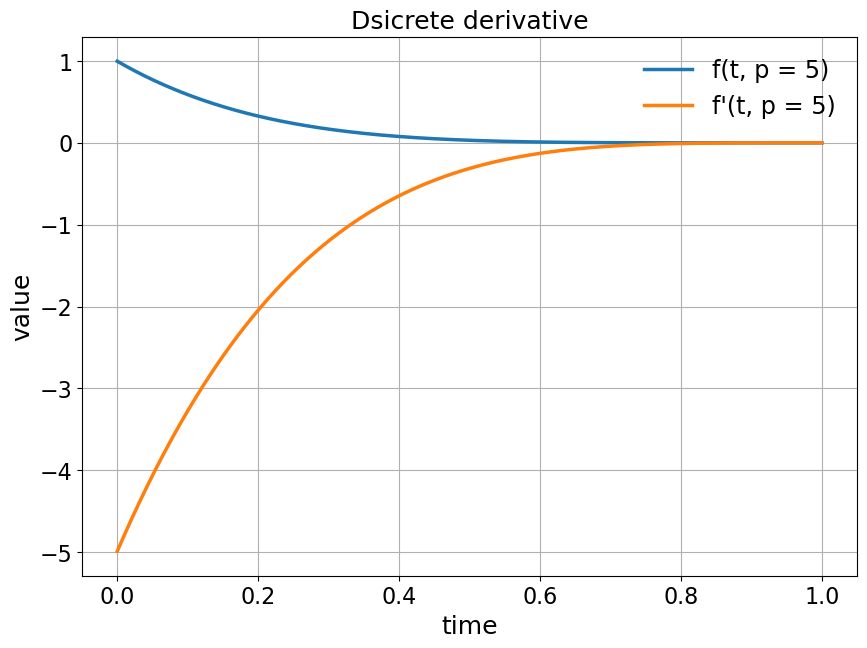

In [4]:
# Discrete path of N points x_i, t_i

N = 1000 # points
ts = np.linspace(0, 1, N)  # time points
xs = fp(ts, p = 5)  # space points with p = 5


# Computing the velocity

dx = xs[1:] - xs[:-1]
dt = ts[1:] - ts[:-1]
v = dx/dt


# To match dimension of derivative and original ts and xs we obtain the mean

t = ( ts[1:] + ts[:-1] ) / 2    
f = ( xs[1:] + xs[:-1] ) /2

print(f"dim(xs) = {len(xs)}, dim(ts) = {len(ts)}")
print(f"dim(v) = {len(v)} , dim(f) = {len(f)} , dim(t) = {len(t)}")


#  plot the discrete derivative and path as function of time

plt.title("Dsicrete derivative")
plt.plot(t, f, label = "f(t, p = 5)")
plt.plot(t, v, label = "f'(t, p = 5)")
plt.xlabel("time")
plt.ylabel("value")
plt.grid()
plt.legend()

## Numerical integral

The goal of this section is to write a python function that compute the discrete integral of a mathematical function $L(t)$ on $[0, 1]$, defined as:
$$
\int^1_0 L(t)\, dt \; \approx \; \sum^{N-2}_{i=0} \: L(t_i) \, \Delta t_i
$$
where $N$ is the number of points used for the discretisation ($t_0=0$, $t_{N-1}=1$) and $\Delta t_i \equiv t_{i+1} - t_{i}$. This method is also known as the rectangle method.

Writting a function taking in argument a mathematical function $L$ and $N$, which:
   1. creates a discrete set of $N$ points $(x_i, t_i)$ from a mathematical equation $L$ (we'll take $N=1000$ by default)
   2. compute the array of $\Delta t_i$
   3. compute and return the discrete integral

In [5]:
# function to calculate integral

def integral(f, N):
    '''
    This function compute a numerical integral using the 
    rectangle method (in thte [0,1] domain).
    - f is a callable taking a float and returning a float
    - N is the number of point used in the discretisation
    '''

    # Dsicretization
    Ti = np.linspace(0, 1, N)  # ti = 0, tf = 1, N points
    f(Ti)

    # Preparing the integral
    dt = t[1:] - t[:-1]
    f = f[:-1] 
    
    # returning the sum
    integral = np.sum(f * dt)

    return integral



## Convergence test using existing data.

For $L(t) = (1-t)^p$, the exact integral can be easily computed and is:
$$
I_{exact} \; \equiv \; \int^1_0 L(t) \, dt \;=\; \frac{1}{p+1}
$$

The goal of this question is to find what is the minium number of discrete points to obtain a precision better than 0.01% on the integral. For this, a dataset `integral_data.csv` is provided and contains the value of the numerical integral for different $N$ values, and this for 7 different values of $p$: `[3, 5, 10, 15, 20, 25, 30]`.

For each p value, a new column is added in the following, corresponding to the relative error of the computed integral:
$$
\sigma = \frac{I - I_{exact}}{I_{exact}}
$$



In [6]:
# loading the data in a pandas data frame and exploring first values

df = pd.read_csv("integral_data.csv")
print("The dimension of the dataframe is ", df.shape)
df.head()

The dimension of the dataframe is  (14900, 8)


,N,p_3,p_5,p_10,p_15,p_20,p_25,p_30
0,1000,0.250501,0.167168,0.091410,0.063002,0.048121,0.038964,0.032761
1,1010,0.250496,0.167163,0.091405,0.062997,0.048116,0.038959,0.032756
2,1020,0.250491,0.167158,0.091401,0.062992,0.048111,0.038954,0.032751
3,1030,0.250486,0.167153,0.091396,0.062987,0.048107,0.038949,0.032746
4,1040,0.250481,0.167148,0.091391,0.062982,0.048102,0.038945,0.032742


In [7]:
# Calculating the relative error and adding it to the df

ps = [3, 5, 10, 15, 20, 25, 30]

for p in ps:
    I_exact = 1 / (p + 1)
    row = f"p_{p}" 
    df[row + "_err"] = ( df[row] - I_exact ) / I_exact 

df.head()

,N,p_3,p_5,p_10,p_15,p_20,p_25,p_30,p_3_err,p_5_err,p_10_err,p_15_err,p_20_err,p_25_err,p_30_err
0,1000,0.250501,0.167168,0.091410,0.063002,0.048121,0.038964,0.032761,0.002003,0.003006,0.005515,0.008028,0.010546,0.013067,0.015593
1,1010,0.250496,0.167163,0.091405,0.062997,0.048116,0.038959,0.032756,0.001983,0.002976,0.005460,0.007948,0.010441,0.012937,0.015438
2,1020,0.250491,0.167158,0.091401,0.062992,0.048111,0.038954,0.032751,0.001964,0.002946,0.005406,0.007870,0.010338,0.012810,0.015286
3,1030,0.250486,0.167153,0.091396,0.062987,0.048107,0.038949,0.032746,0.001945,0.002918,0.005354,0.007793,0.010237,0.012685,0.015136
4,1040,0.250481,0.167148,0.091391,0.062982,0.048102,0.038945,0.032742,0.001926,0.002890,0.005302,0.007718,0.010138,0.012562,0.014990


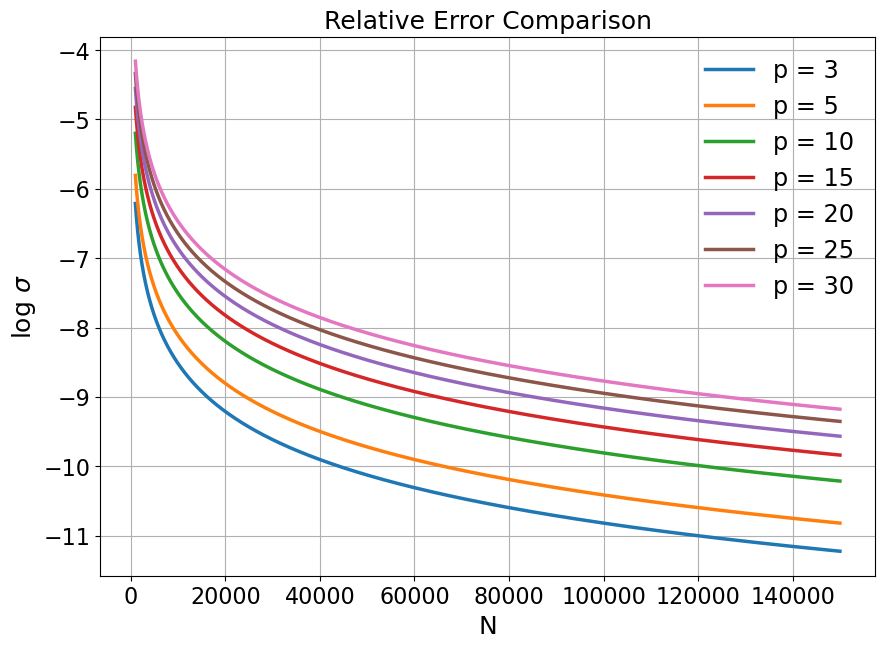

In [8]:
# Plot the logarithm of the relative error versus N, for all p values on the same figure

plt.title("Relative Error Comparison")
Ns = df["N"]
for p in ps:
    row_err = f"p_{p}_err" 
    plt.plot(Ns, np.log(df[row_err]), label = f"p = {p}")

plt.ylabel("log $\sigma$")
plt.xlabel("N")
plt.grid()
plt.legend()

plt.savefig("relative_error_comparison.png", dpi = 300)

Finding the first value of N for which $\sigma<10^{-4}$, for each value of $p$.

N = 20010, p = 3
N = 30010, p = 5
N = 55010, p = 10
N = 80010, p = 15
N = 105010, p = 20
N = 130010, p = 25


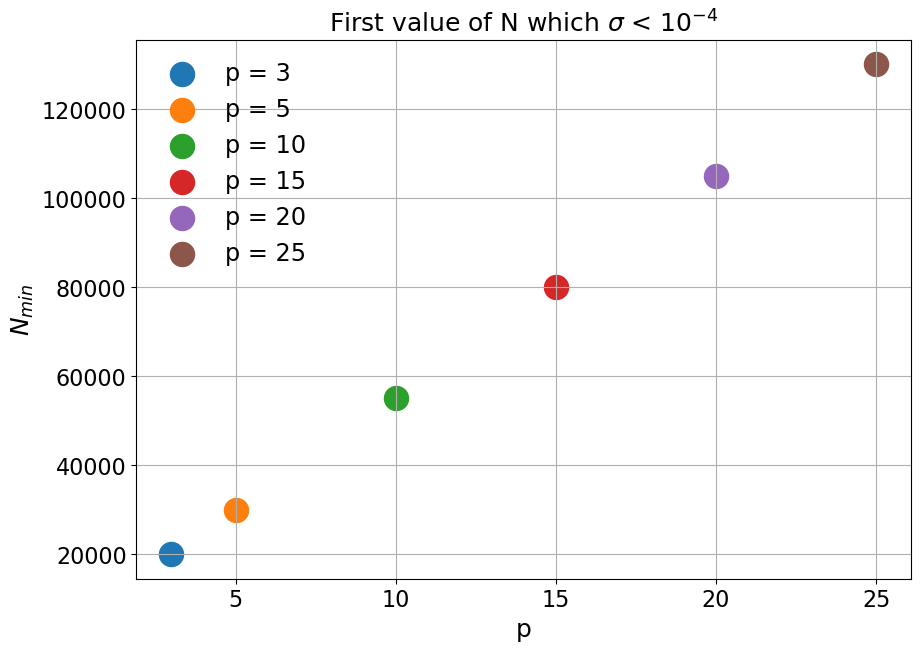

In [9]:
# loop over the ps
sigma_condition = 10**-4

plt.title(r"First value of N which $\sigma$ < $10^{-4}$")
for p in ps:
    row = f"p_{p}_err"
    mask = df[row].values < sigma_condition
    Ns = df["N"][mask].values
    if Ns.size > 0:
        print(f"N = {Ns[0]}, p = {p}")
        plt.scatter(p, Ns[0], marker = "o", s = 300, label = f"p = {p}")

plt.xlabel("p")
plt.ylabel("$N_{min}$")
plt.grid()
plt.legend()
plt.savefig("points_minimizing_error.png", dpi = 300)

## Computing the action of a system

We now have everything in hand to compute a path integral. For this, we define the *lagrangien* of the system as being $\mathcal{L} = K - V$, where $K$ is the kinetic energy $K=\frac{1}{2} m \left(\frac{\Delta x}{\Delta t}\right)^2$ and $U$ is the potential energy (*e.g.* for a free falling problem, $V(x) = -mgx$). The lagrangien is a function of time, through the trajectory $x(t)$ and an integral over time can be performed : it defines the *action* $\mathcal{S} = \int \mathcal{L}(t) dt$. Note that the lagrangian can be seen as a 'function of function', since it depends on $t$ only *via* a function $x(t)$.

Definning a python function `lagrangian_terms(f, N)` which takes in argument a function `f(x)` and $N$, being the number of discret points, and returns four arrays:
 + `T`: $(t_i+t_{i+1})/2$ values, 
 + `dT`: $(t_i-t_{i+1})$ values, 
 + `K` and `V` such as $\mathcal{L} = K-V$.
 
We consider the case of a free falling system with $m=1$kg and $g=1$m.s$^{-2}$ : 

$$
K=\frac{1}{2} m \left(\frac{\Delta x}{\Delta t}\right)^2
$$

$$
V = -x(t)
$$


In [10]:
# Degyining lagrangian function
def lagrangian_terms(f, N):
    '''
    Return four arrays, X, dX and K and V. The last two 
    are the two lagrangian terms K, V such as
       L = K - V
    
    Arguments:
    - f is the path: a callable such as f(float) = float 
    - N is the number of discrete points.
    '''

    # Discretization time and path
    Ts = np.linspace(0, 1, N)
    Xs = f(Ts)

    # Computing derivative and mean
    dT = ( Ts[1:] - Ts[:-1] )
    dX = ( Xs[1:] - Xs[:-1] )
    T = ( Ts[1:] + Ts[:-1] ) / 2
    X = ( Xs[1:] + Xs[:-1] ) / 2


    # Lagrangian
    K = (1/2) * pow( dX/dT, 2)
    V = - X

    # Return the two T-related arrays and 
    # two terms of the lagrangian.
    return T, dT, K, V
    

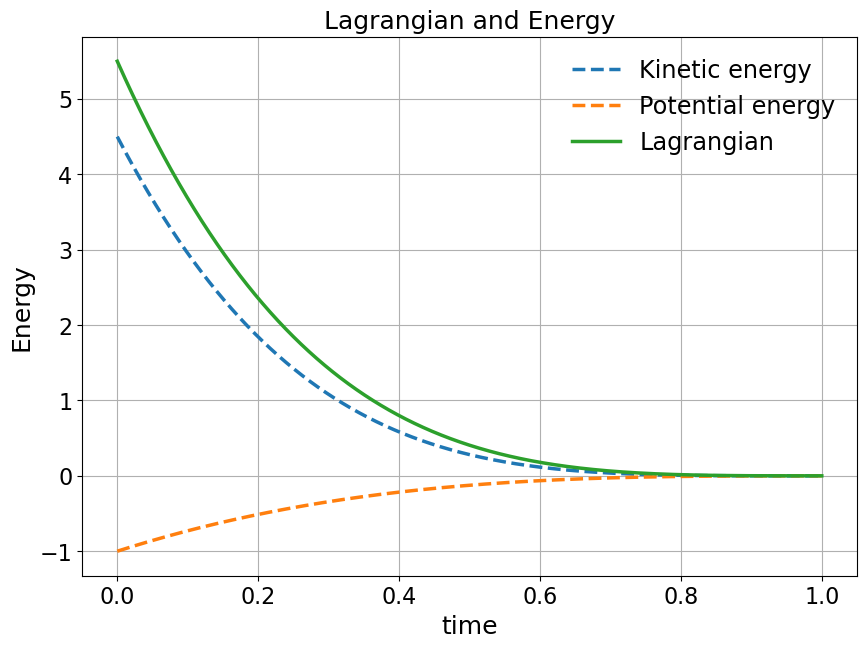

In [11]:
# Path, points, K, V and Lagrangian

N = 10000  # points
def trajectory(t):   #path
    return (1 - t)**3
T, dT, K, V = lagrangian_terms(trajectory, N)


# Plotting K, V, and the lagrangien as function of time

plt.title("Lagrangian and Energy")
plt.plot(T, K, ls = "--", label = "Kinetic energy")
plt.plot(T, V, ls = "--", label = "Potential energy")
plt.plot(T, K-V, label = "Lagrangian")
plt.xlabel("time")
plt.ylabel("Energy")
plt.legend()
plt.grid()

plt.savefig("lagrangian_energy.png", dpi = 300)

In [12]:
def action(lag, traj, N):
    T, dT, K, V = lagrangian_terms(traj, N) # Lagrangian terms
    S = np.sum( (K-V) * dT )  # action
    return S
S = action(lagrangian_terms, trajectory, N)
print(f"The action for the free falling problem with a trajectory x(t)=(1-t)^3 is S = {S:.2f} Js")

The action for the free falling problem with a trajectory x(t)=(1-t)^3 is S = 1.15 Js


The value of p that minimizes the action S is p_min = 1.40 with S_min = 0.96


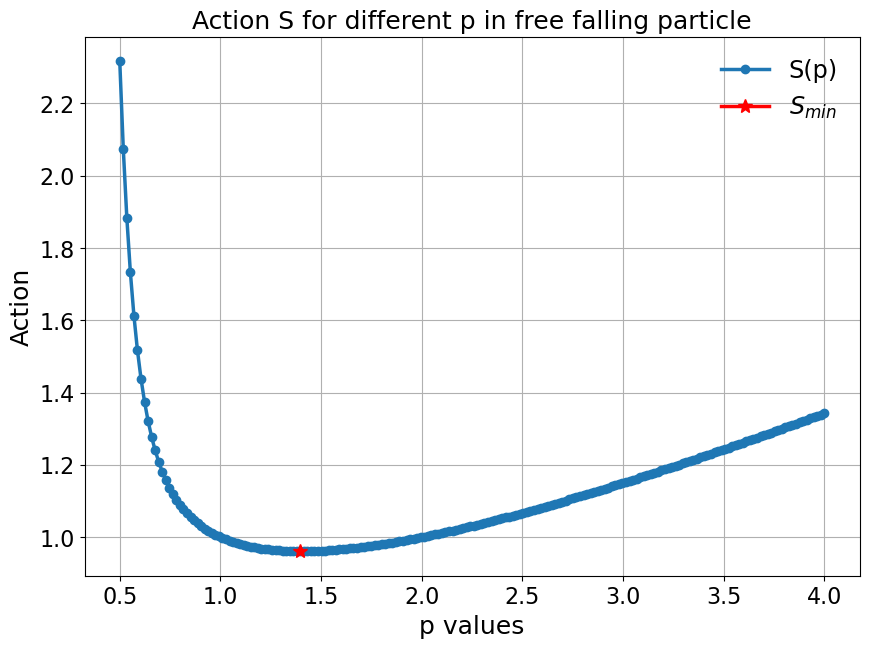

In [13]:
# Finding the value p that minimizes the action

# parameters

N = 10000
Ts = np.linspace(0,1,N)
Ps = np.linspace(0.5, 4, 200)


# loop over p values

actions = []  # action values
for p in Ps:
    S = action(lagrangian_terms, lambda t: (1-t)**p, N)
    actions.append(S)


# PLotting the different action values

plt.title("Action S for different p in free falling particle")
plt.plot(Ps, actions, marker = "o", label = "S(p)")
plt.xlabel("p values")
plt.ylabel("Action")




# finding the p that minimizes action

idx_p_min = np.argmin(actions)
p_min = Ps[idx_p_min] 
s_min = actions[idx_p_min] 
print(f"The value of p that minimizes the action S is p_min = {p_min:.2f} with S_min = {s_min:.2f}")
plt.plot(p_min, np.min(actions), marker = "*", markersize = 10, color = "red", label = "$S_{min}$")
plt.grid()
plt.legend()
plt.savefig("action_different_pval.png", dpi = 300)

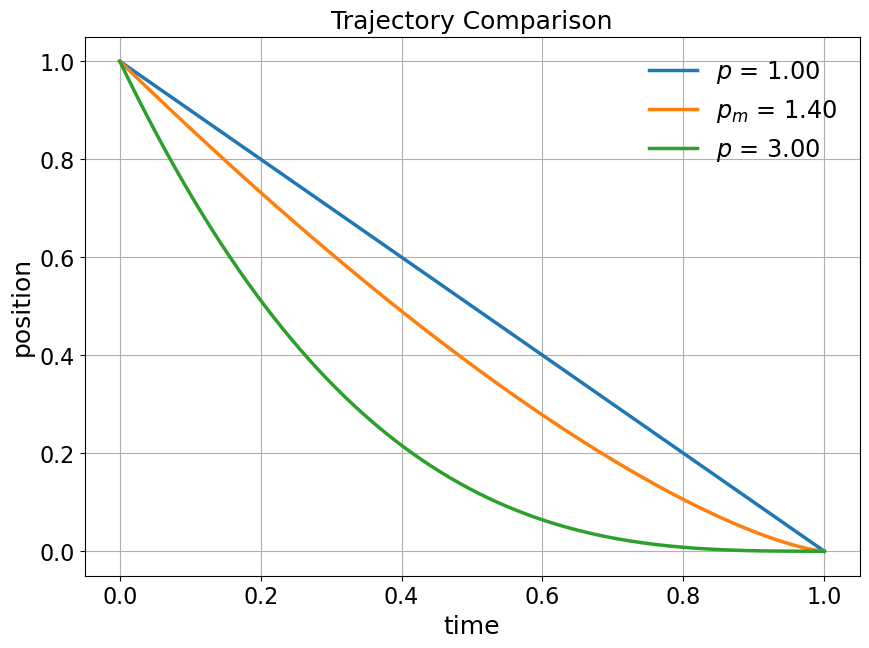

In [14]:
# Trajectory comparisson 
#Parameters

N = 10000
Ps = [1, p_min, 3]
Ts = np.linspace(0, 1, N)


# Plot Trajectories
plt.title("Trajectory Comparison")
for p in Ps:
    if p == p_min:
        plt.plot(Ts, fp(Ts, p), label = f"$p_m$ = {p:.2f}")
    else:
        plt.plot(Ts, fp(Ts, p), label = f"$p$ = {p:.2f}")

plt.xlabel("time")
plt.ylabel("position")
plt.grid()
plt.legend()
plt.savefig("trajectory_comparison", dpi = 300)